In [1]:
# Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# import pdb (for debugging process)


# Visualizer Size
plt.rcParams['figure.figsize'] = [15, 7]

In [2]:
os.chdir(r'C:\Users\andre.bravo\Documents\python\Python-Data-Science-and-Machine-Learning-Bootcamp\ML from Scratch\1. Simple Linear Regression\Datasets')

In [3]:
# Handeling Data

# Importing Data (Excel)
dataset = pd.read_csv('Housing_Data.csv') # path for dataset
indepX = dataset.iloc[:,[0]].values
depY = dataset.iloc[:,[1]].values

# Splitting Data
from sklearn.model_selection import train_test_split
indepX_train, indepX_test, depY_train, depY_test = train_test_split(indepX, depY, 
                                                                    test_size = 0.3, 
                                                                    random_state = 42)

In [4]:
# Hypothesis Function

def hyp(theta, x):
    return theta[0] + theta[1] * x

In [5]:
# Error/Cost Function

def errorFunc(theta, indepX, depY):
    
    # Initialization
    m = len(indepX)
    error = 0
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        error += (y - (theta[1] * x + theta[0])) ** 2
        
    return error / (2*m)

In [6]:
# Gradient / Del Function

def grad(indepX, depY, curr_theta, learning_rate):
#     pdb.set_trace()  for debugging process 
    # Initialization
    grad = np.zeros(2)
    new_theta = curr_theta
    m = len(indepX)
    
    # Adjustments
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        
        grad[0] += (-1/m) * (y - (curr_theta[0] + (curr_theta[1] * x)))
        grad[1] += (-1/m) * x * (y - (curr_theta[0] + (curr_theta[1] * x)))
    
    temp0 = curr_theta[0] - (learning_rate * grad[0])
    temp1 = curr_theta[1] - (learning_rate * grad[1])
    
    new_theta[0] = temp0
    new_theta[1] = temp1
    
    return new_theta

In [7]:
# Gradient Descent Function

def gradientDescent(indepX,depY, init_theta, learning_rate, num_iterations):
    
    # Initialization
    theta = init_theta
    J = [0 for i in range(num_iterations)]

    # Iterating the Process
    for i in range(num_iterations):
        
        theta = grad(indepX, depY, theta, learning_rate)
        J[i] = errorFunc(theta, indepX, depY)
        
    return theta, J

In [8]:
# Main Function

def main():
    
    # Initialization
    init_theta = np.zeros(2)
    learning_rate = 0.05
    num_iterations = 100
    H = [0 for i in range(len(indepX_train))]
    J = [0 for i in range(num_iterations)]
    
    # Calling Functions
    theta, J = gradientDescent(indepX_train, depY_train, init_theta, learning_rate, num_iterations)
    H = hyp(theta, indepX_train)
    
    # Check
    for i in range(len(depY_test)):
        print(float(H[i]))
        print(depY_test[i])
        print('----------')

    # Visualization
    
    # Visualize J
    plt.plot(J, color = 'green')
    plt.title('Error vs No.Itrerations')
    plt.xlabel('Itrerations')
    plt.ylabel('Cost Function')
    plt.show()
    
    # Visualize H
    plt.scatter(indepX_train, depY_train, color = 'red')
    plt.plot(indepX_train, H, color = 'blue')
    plt.title('Size vs Price (Training set)')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.show()
    
        

In [11]:
indepX

array([[ 477],
       [ 496],
       [ 524],
       [ 571],
       [ 770],
       [ 785],
       [ 795],
       [ 796],
       [ 826],
       [ 834],
       [ 908],
       [ 909],
       [ 968],
       [ 972],
       [1049],
       [1399],
       [1560],
       [1589],
       [1773],
       [1773],
       [1830],
       [1941],
       [2116],
       [2131],
       [2190],
       [2227],
       [2273],
       [2353],
       [2373],
       [2463],
       [2520],
       [2563],
       [2688],
       [2739],
       [2765],
       [2835],
       [2916],
       [2946],
       [3102],
       [3117],
       [3370],
       [3442],
       [3443],
       [3444],
       [3470],
       [3578],
       [3595],
       [3644],
       [3931],
       [3970]], dtype=int64)

In [10]:
indepX_train

array([[ 795],
       [3442],
       [3595],
       [3644],
       [1399],
       [ 834],
       [1560],
       [2190],
       [2765],
       [2563],
       [ 477],
       [3470],
       [2353],
       [2739],
       [ 785],
       [2463],
       [ 909],
       [2916],
       [ 496],
       [1941],
       [ 524],
       [3444],
       [2835],
       [2131],
       [3370],
       [ 908],
       [2116],
       [1773],
       [3970],
       [1830],
       [ 796],
       [3443],
       [1049],
       [2373],
       [3102]], dtype=int64)

nan
[118525]
----------
nan
[332981]
----------
nan
[260935]
----------
nan
[402892]
----------
nan
[157694]
----------
nan
[439039]
----------
nan
[189318]
----------
nan
[183504]
----------
nan
[282501]
----------
nan
[159783]
----------
nan
[118364]
----------
nan
[66702]
----------
nan
[312044]
----------
nan
[89792]
----------
nan
[63755]
----------


c:\users\andre.bravo\documents\python\python-data-science-and-machine-learning-bootcamp\pyboot\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
c:\users\andre.bravo\documents\python\python-data-science-and-machine-learning-bootcamp\pyboot\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add
c:\users\andre.bravo\documents\python\python-data-science-and-machine-learning-bootcamp\pyboot\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


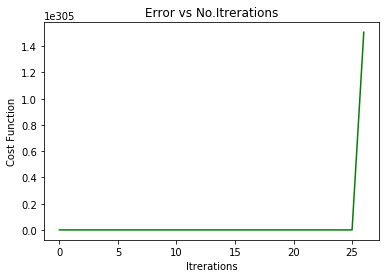

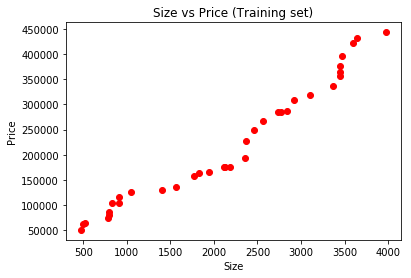

In [9]:
if __name__ == '__main__':
    main()